In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import lmfit as lm
import scipy.special as sf
from scipy.stats import norm,multivariate_normal

In [2]:
# the plan is to simulate intensity distribution by using a Poisson distribution
# over a small area.  The first thing that we have to figure out is over which length
# a normal distribution will be non-zero given double resolution
w = 2 # is the way the Gaussian width is defined in optics
sigma = w/2
ep = 1.0
x = np.linspace(-20,20,200)
intensity = ep*sigma*np.sqrt(2*np.pi)*norm.pdf(x, loc=0,scale=sigma)
#print(intensity)
print(x[1],x[-2])

-19.798994974874372 19.798994974874375


In [3]:
# set limits and define the length of the box
xlim1 = x[1]
xlim2 = x[-2]
L = xlim2-xlim1
print(L)

39.59798994974875


In [25]:
# we want a certain number of particles per area
# for a particular w which represents an effective size of pi/2*w**2
N_avg = 2
N_avg_L = N_avg*L*L/np.pi*2/w**2
print(N_avg_L)

499.11015874979876


In [5]:
# lets try how to make a list of random numbers
n = 3
multivariate_normal.pdf(np.add(np.multiply(np.random.random(n*2),L),xlim1).reshape(n,2),
                        mean=[0,0],
                        cov=[[1/sigma**2,0],[0,1/sigma**2]])

array([1.13759981e-30, 1.78051623e-10, 4.77153770e-66])

In [26]:
N_samples = 1000000
N_draws = np.random.poisson(N_avg_L,N_samples)
int_list = [np.sum(ep*sigma**2*2*np.pi*
                multivariate_normal.pdf(np.add(np.multiply(np.random.random(n*2),L),xlim1).reshape(n,2),
                                        mean=[0,0],cov=[[1/sigma**2,0],[0,1/sigma**2]]))
                  for n in N_draws]
int_list = np.array(int_list)

(0, 1)

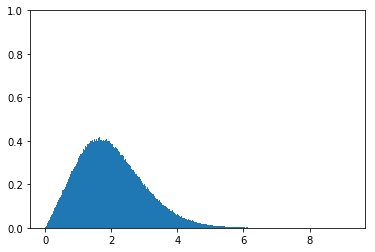

In [27]:
_ = plt.hist(int_list,bins=500,density=True)
plt.ylim((0,1))
#plt.xlim((0.06,0.065))

In [28]:
int_list.mean()

2.0015018148789054

In [9]:
print(np.pi**2/16)

0.6168502750680849
